In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=';')  # 핵심: sep=';'
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#칼럼명 확인 후 결측지 확인을 해야됨
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
#레이블 불균형 확인
#어디에 초점이 맞춰져있는 데이터인지 확인.
df['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


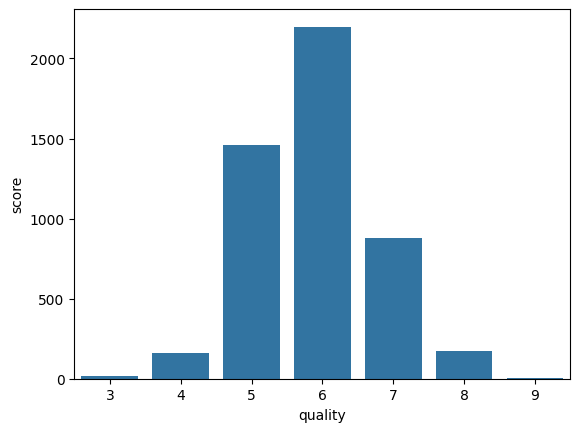

In [ ]:
#레이블 갯수확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="quality")
plt.xlabel("quality")
plt.ylabel("score")
plt.show()

In [ ]:
# 입력과 출력 분리

X = df.drop(columns=["quality"])
y = df["quality"]

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [ ]:
# 훈련과 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)

In [ ]:
# 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [ ]:
#knn 모델을 위한 스케일링.
#X, y 데이터를 분리 후 X 데이터에 스케일링을 적용한 것.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [ ]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)


In [ ]:
#KNN 모델 구성
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="minkowski",
    p=2
)

In [ ]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
#KNN 사용 (학습/평가)

knn_clf.fit(X_train_s, y_train)
knn_y_pred = knn_clf.predict(X_test_s)

In [ ]:

# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [ ]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 0.5908
[[  0   1   2   1   0   0   0]
 [  0   9  14   8   1   1   0]
 [  0  15 174  81  14   7   0]
 [  1  12  81 275  62   9   0]
 [  0   1  15  55 100   5   0]
 [  0   1   1   6   6  21   0]
 [  0   0   0   0   1   0   0]]
=== RF Test Accuracy ===
Random Forest : 0.6776
[[  0   0   1   3   0   0   0]
 [  0   7  18   8   0   0   0]
 [  0   3 191  97   0   0   0]
 [  0   1  50 362  27   0   0]
 [  0   0   4  87  85   0   0]
 [  0   0   1   8   7  19   0]
 [  0   0   0   0   1   0   0]]
=== LR Test Accuracy ===
Logistic Reg. : 0.5173
[[  0   0   1   3   0   0   0]
 [  0   0  19  14   0   0   0]
 [  0   0 135 156   0   0   0]
 [  0   1  75 358   6   0   0]
 [  0   0  16 146  14   0   0]
 [  0   0   7  21   7   0   0]
 [  0   0   0   1   0   0   0]]


In [ ]:
#KNN 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix

knn_acc = accuracy_score(y_test, knn_y_pred)

print("=== KNN Test Accuracy ===")
print(f"KNN : {knn_acc:.4f}")
print(confusion_matrix(y_test, knn_y_pred))

=== KNN Test Accuracy ===
KNN : 0.6204
[[  0   0   1   2   0   1   0]
 [  0  10  12  11   0   0   0]
 [  0   5 171 101  13   1   0]
 [  0   3  75 308  48   6   0]
 [  0   0   7  67  98   4   0]
 [  0   0   1   7   6  21   0]
 [  0   0   0   1   0   0   0]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 1.46438279e-01  1.14915858e-02 -1.01808238e-02 -1.31942854e-02
  -2.44828055e-03  4.01251950e-02 -8.98305997e-03 -2.91306512e-02
  -9.80419493e-02 -2.63627926e-02 -2.60159384e-01]
 [ 4.88656623e-01  2.90307659e-01 -8.27156186e-02 -3.63415195e-02
   1.61267243e-02 -6.05825353e-02  1.02597658e-02  4.39008265e-02
   1.81284619e-01 -1.01177163e-02 -3.38400666e-01]
 [ 2.17281737e-01  6.82173612e-01 -4.69525647e-02  1.50235489e-03
   8.63005549e-02 -7.95313987e-03  1.14683725e-02  4.33400156e-01
   1.05868791e+00 -1.26979934e-01 -4.80740526e-01]
 [-3.68896978e-02 -6.17752889e-01  1.83681391e-01  2.63180829e-02
  -9.08779770e-03  2.36770453e-03  7.30575834e-03  1.65804151e-02
   3.86837435e-02  1.34981939e-01  1.53059415e-01]
 [-1.07481691e-01 -3.15671618e-01 -3.44998022e-02  1.60239492e-02
  -7.04757664e-02  1.29055588e-02  7.32800477e-04 -3.11217515e-01
  -7.55730798e-01  9.38510486e-02  4.58887113e-01]
 [-6.70661711e-01 -4.66579026e-02 -1.15760900e-02  6.06472276e-02
  -1.85385200e-02  